<p style="font-family: Arial; font-size:2.10em;color:purple; font-style:bold">Analysis of users events from an eCommerce website</p>

#### This is my final project presented in the Python for Data Science course in EDX

In this project I used a dataset from Kaggle containing users' events from an eCommerce website to find out some metrics and to create a model to predict the next purchase date of a product


I applied all the concepts I learned during the course, including:
    * Introduction to Data Science
    * Jupyter Notebooks, Numpy and Pandas
    * Data Importing
    * Data Cleaning and exploration
    * Data Visualization
    * Introduction and application of Machine Learning Algorithms 

#### Motivation
 * All companies wants more customers, more orders, more revenue, more signups, more efficiency.
 * To do that we need to find out metrics that best captures the core value that products delivered to customers
 
 We this on mind, we will analyze a dataset containing users' events from an eCommerce website and we will try to discover this metrics
 Finally we will train some ML  algorithms to predict the next purchase day of a product.


#### Research Questions

* How many purchases we have in each month?
* What was the Monthly Revenue?
* What was the number of Monthly Active Customers?
* Who were the main buyers in each month?
* Which brands were the top 10 sellers in each month?
* Which products were the top 10 sellers in each month?
* How was the distribution of events each month? 
* Can we predicting the Next Purchase Day of a product?


In [ ]:
#Importing the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Ecommerce Cosmetics Shop Data Description</p>

#### Dataset Used
* eCommerce Events History in Cosmetics Shop
* This dataset contains 20M users' events from eCommerce website
* Contains behavior data for 5 months (Oct 2019 – Feb 2020) from a medium cosmetics online store

For the purpose of this analysis only the data from December 2019 and January 2020 were used


In [2]:
#import the dataset info a dataframe
data_Dec = pd.read_csv('C:/Users/clara.o.villalba/Documents/Curso EDX/Week-9-ExampleNotebooks/TP/eCommerce_Cosmetics_ Shop_Inputs/2019-Dec.csv')
data_Jan = pd.read_csv('C:/Users/clara.o.villalba/Documents/Curso EDX/Week-9-ExampleNotebooks/TP/eCommerce_Cosmetics_ Shop_Inputs/2020-Jan.csv')

#### Semantic of the datasets
    User **userid** during session **usersession** added to shopping cart (property **eventtype** is equal **cart**) 
    product **productid** of brand **brand** of category **categorycode** (categorycode) with price **price** at **event_time**
    
Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

In [3]:
data_Dec.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [4]:
data_Dec.describe()

,product_id,category_id,price,user_id
count,3.533286e+06,3.533286e+06,3.533286e+06,3.533286e+06
mean,5.473054e+06,1.555023e+18,8.871856e+00,5.223318e+08
std,1.331331e+06,1.689262e+17,1.986474e+01,8.494819e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.180452e+06
25%,5.726191e+06,1.487580e+18,2.060000e+00,4.866830e+08
50%,5.811429e+06,1.487580e+18,4.210000e+00,5.566496e+08
75%,5.859462e+06,1.487580e+18,7.140000e+00,5.828019e+08
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08


In [5]:
data_Dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [6]:
data_Jan.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [7]:
data_Jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264752 entries, 0 to 4264751
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 292.8+ MB


### Data Cleaning Steps
As we can see there are some nulls in our data, let's do some cleaning

In [190]:
data_Dec_clean = data_Dec.dropna()
print(data_Dec.shape)
print(data_Dec_clean.shape)

(3533286, 9)
(43193, 9)


As we can see, now we have less rows.
Just let's check if there is any missing null value...

In [9]:
data_Dec_clean.isnull().any(axis=1)

33         False
52         False
90         False
112        False
138        False
           ...  
3532871    False
3532874    False
3533061    False
3533221    False
3533226    False
Length: 43193, dtype: bool

As we see there is no null values any more.
Now lets do the same with the data_Jan Dataset..

In [191]:
data_Jan_clean = data_Jan.dropna()
print(data_Jan.shape)
print(data_Jan_clean.shape)

(4264752, 9)
(57768, 9)


In [11]:
data_Jan_clean.isnull().any(axis=1)

359        False
380        False
487        False
907        False
987        False
           ...  
4264525    False
4264534    False
4264594    False
4264721    False
4264738    False
Length: 57768, dtype: bool

### Data Analysis

#### 1- How many diferents categories we have, and how many values for each one?

In [186]:
print("Unique Categories in December = ",len(data_Dec_clean['category_code'].value_counts()))
print('-' * 50)
print(data_Dec_clean['category_code'].value_counts())
print('-' * 50)
print('-' * 50)
print("Unique Categories in Jan = ",len(data_Jan_clean['category_code'].value_counts()))
print('-' * 50)
print(data_Jan_clean['category_code'].value_counts())

Unique Categories in December =  9
--------------------------------------------------
appliances.environment.vacuum             23084
stationery.cartrige                        8410
apparel.glove                              5825
furniture.bathroom.bath                    2775
furniture.living_room.cabinet              1583
accessories.bag                             867
accessories.cosmetic_bag                    301
appliances.personal.hair_cutter             273
appliances.environment.air_conditioner       75
Name: category_code, dtype: int64
--------------------------------------------------
--------------------------------------------------
Unique Categories in Jan =  10
--------------------------------------------------
appliances.environment.vacuum             28979
stationery.cartrige                       10392
apparel.glove                              9958
furniture.bathroom.bath                    4350
furniture.living_room.cabinet              2249
accessories.bag         

We have 9 categories in December 2019 and 10 categories in January 2020. 
This last have the category appliances.personal.massager that is not in December

#### 2- How many differents brands we have? and How many rows for each?

In [270]:
unique_dec_brands = data_Dec_clean['brand'].value_counts()
unique_jan_brands = data_Jan_clean['brand'].value_counts()
print("Unique brands in December = ",len(unique_dec_brands))
print('-' * 32)
print(unique_dec_brands.head())
print('-' * 32)
print("Unique brands in January = ",len(unique_jan_brands))
print('-' * 32)
print(unique_jan_brands.head())

Unique brands in December =  38
--------------------------------
italwax    6490
max        5961
polarus    4938
runail     4191
emil       3969
Name: brand, dtype: int64
--------------------------------
Unique brands in January =  38
--------------------------------
italwax    8472
max        7125
benovy     6465
polarus    6430
emil       5595
Name: brand, dtype: int64


We have 38 brands in each month

#### 3- Do we have negative prices?
Let's check if we have negative values in the prices

In [14]:
print(data_Dec_clean.loc[data_Dec_clean['price']<0][['product_id','price']].drop_duplicates())
print(data_Jan_clean.loc[data_Jan_clean['price']<0][['product_id','price']].drop_duplicates())

Empty DataFrame
Columns: [product_id, price]
Index: []
Empty DataFrame
Columns: [product_id, price]
Index: []


As we can see we don't have negative prices

#### 4- How many purchases we have in each month?

In [15]:
# Get only purchases
dec_purchases = data_Dec_clean.loc[data_Dec_clean.event_type == 'purchase']
#print(dec_purchases.head())
jan_purchases = data_Jan_clean.loc[data_Jan_clean.event_type == 'purchase']
#print(jan_purchases.head())

In [16]:
print("Purchases in December: ",len(dec_purchases))
print("Purchases in January: ", len(jan_purchases))

Purchases in December:  2111
Purchases in January:  3160


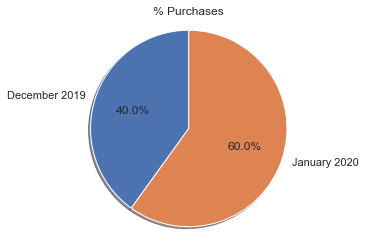

In [180]:
# Pie chart of % purchases
labels = 'December 2019', 'January 2020'
sizes = [2111, 3160]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% Purchases')

plt.show()

We have more purchases in January

#### 5- What was the Monthly Revenue?
We now can calcule the revenue in each month

In [17]:
revenue_dec = dec_purchases['price'].sum()
revenue_jan = jan_purchases['price'].sum()
print('December Revenue: ', revenue_dec)
print('January Revenue: ',revenue_jan)

December Revenue:  32125.35
January Revenue:  45313.29


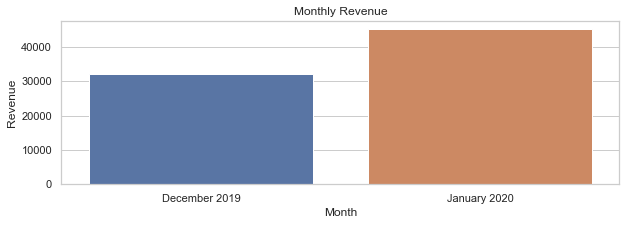

In [181]:
import seaborn as sns
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 3))
ax.set_ylabel('Revenue')
ax.set_xlabel('Month')
ax.set_title('Monthly Revenue')
labels = ['December 2019', 'January 2020']
y_values = [revenue_dec, revenue_jan]
ax = sns.barplot(x=labels, y=y_values)

The revenue increase from 32125.35 in December 2019 to 45313.29  in January 2020

#### 6- What was the number of Monthly Active Customers?

In [18]:
#counting unique users IDs
customers_dec = data_Dec_clean['user_id'].nunique()
customer_jan = data_Jan_clean['user_id'].nunique()
print('Active Custumers in December: ' , customers_dec)
print('Active Custumers in January : ' ,customer_jan)

Active Custumers in December:  13318
Active Custumers in January :  16832


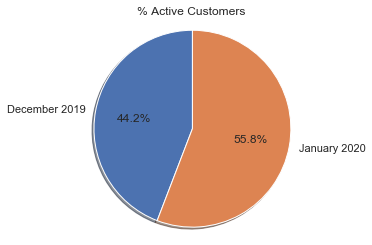

In [183]:
# Pie chart of % active customers
labels = 'December 2019', 'January 2020'
sizes = [13318, 16832]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('% Active Customers')

plt.show()

In January 2020 the number of active customers went up from 13318 in December 2019 to 16832 

### Calculate some metrics

#### 1- Which brands were the top 10 sellers in each month?

In [19]:
#first we look for the top sellers brands of each month
dec_top_sellers = dec_purchases.groupby('brand').brand.agg([len]).sort_values(by='len', ascending=False)
dec_top_sellers= dec_top_sellers.reset_index()
dec_top_sellers_top10 = dec_top_sellers[:10]
#print(dec_top_sellers)
#print('-' * 20)
jan_top_sellers = jan_purchases.groupby('brand').brand.agg([len]).sort_values(by='len', ascending=False)
jan_top_sellers = jan_top_sellers.reset_index()
jan_top_sellers_top10 = jan_top_sellers[:10]
#print(jan_top_sellers)

Now let's create a grouped bar chart to compare the top 10 total sales in both months. 
To do that I used matplotlib documentation:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    

In [20]:
labels = dec_top_sellers_top10['brand'].values.tolist()
labels2 = jan_top_sellers_top10['brand'].values.tolist()
print(labels)
print(labels2)

['italwax', 'benovy', 'depilflax', 'max', 'polarus', 'irisk', 'emil', 'domix', 'runail', 'nitrimax']
['italwax', 'benovy', 'emil', 'max', 'polarus', 'domix', 'irisk', 'depilflax', 'nitrimax', 'runail']


As we can see we have the same top 10 brands, we are using them like labels

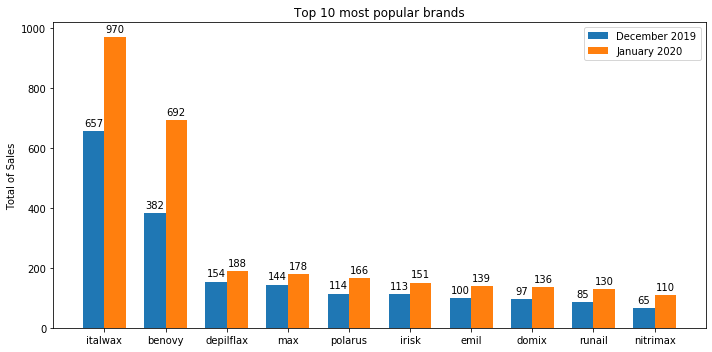

In [21]:
labels = dec_top_sellers_top10['brand'].values.tolist()
dec_values = dec_top_sellers_top10['len'].values.tolist()
jan_values = jan_top_sellers_top10['len'].values.tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, dec_values, width, label='December 2019')
rects2 = ax.bar(x + width/2, jan_values, width, label='January 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total of Sales')
ax.set_title('Top 10 most popular brands')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

As we can see in the bar chart above, there were more sales in January 2020 than December 2019 for the same top 10 brands

#### 2- Which products were the top 10 sellers in each month?

In [22]:
#the 10 top sellers products id of each month
dec_top_prod_sellers = dec_purchases.groupby('product_id').brand.agg([len]).sort_values(by='len', ascending=False)[:10]
dec_top_prod_sellers= dec_top_prod_sellers.reset_index()
print(dec_top_prod_sellers)
print('-' * 25)
jan_top_prod_sellers = jan_purchases.groupby('product_id').brand.agg([len]).sort_values(by='len', ascending=False)[:10]
jan_top_prod_sellers = jan_top_prod_sellers.reset_index()
print(jan_top_prod_sellers)

   product_id  len
0     5766980  126
1     5749199   80
2     5901858   67
3     5901987   62
4     5749198   57
5     5911195   56
6     5775814   55
7     5732026   53
8     5810083   51
9     5743974   46
-------------------------
   product_id  len
0     5766980  151
1     5749199  130
2     5901858  124
3     5861764   93
4     5911195   92
5     5901987   91
6     5743974   74
7     5788783   72
8     5901859   71
9     5749198   63


 Let's create a grouped bar chart to compare the top 10 total sales in both months

In [23]:
labels_prod_dec = dec_top_prod_sellers['product_id'].values.tolist()
labels_prod_jan = jan_top_prod_sellers['product_id'].values.tolist()
print(labels_prod_dec)
print(labels_prod_jan)
dec_values_prod = dec_top_prod_sellers['len'].values.tolist()
jan_values_prod = jan_top_prod_sellers['len'].values.tolist()
print(dec_values)
print(jan_values)


[5766980, 5749199, 5901858, 5901987, 5749198, 5911195, 5775814, 5732026, 5810083, 5743974]
[5766980, 5749199, 5901858, 5861764, 5911195, 5901987, 5743974, 5788783, 5901859, 5749198]
[657, 382, 154, 144, 114, 113, 100, 97, 85, 65]
[970, 692, 188, 178, 166, 151, 139, 136, 130, 110]


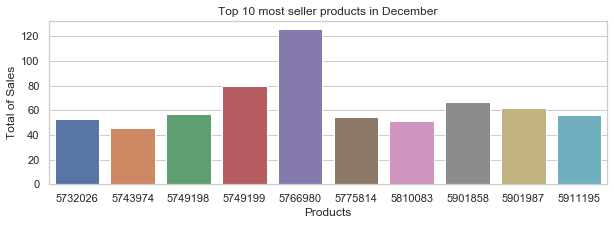

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 3))
ax.set_ylabel('Total of Sales')
ax.set_xlabel('Products')
ax.set_title('Top 10 most seller products in December')
ax = sns.barplot(x=labels_prod_dec, y=dec_values_prod)


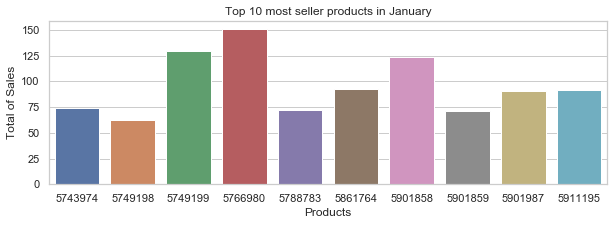

In [25]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 3))
ax.set_ylabel('Total of Sales')
ax.set_xlabel('Products')
ax.set_title('Top 10 most seller products in January')
ax = sns.barplot(x=labels_prod_jan, y=jan_values_prod)

We can see that the top seller product was 5766980 in both months

#### 3- Who user was the top buyer in each month?

We need to find the total number purchases orders for each customer

In [26]:
dec_purchase_frequency = dec_purchases.groupby('user_id').event_time.count().reset_index()
dec_purchase_frequency = dec_purchase_frequency.sort_values(by='event_time', ascending=False)[:10]
print(dec_purchase_frequency)
print('-' * 30)
jan_purchase_frequency = jan_purchases.groupby('user_id').event_time.count().reset_index()
jan_purchase_frequency = jan_purchase_frequency.sort_values(by='event_time', ascending=False)[:10]
print(jan_purchase_frequency)

        user_id  event_time
438   494776094          14
1374  591224965          13
1273  587637758          12
1081  582066080          10
408   487872370           9
1222  586026006           7
1112  582927698           7
183   416321822           7
837   565036131           7
1229  586173827           6
------------------------------
        user_id  event_time
1028  558030082          23
838   535037929          22
473   466753586          15
1798  602520669          12
1458  596184821           9
1346  588645683           9
296   419987792           9
184   379775300           9
1768  602172708           8
1839  603453051           8


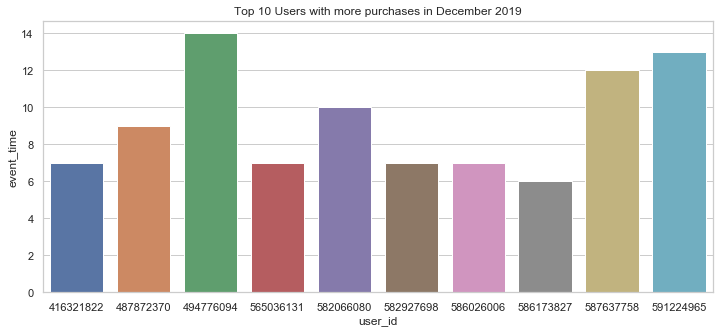

In [34]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 5))
plt.ylabel('Total of purchases')
plt.xlabel('User ID')
ax.set_title('Top 10 Users with more purchases in December 2019')
ax = sns.barplot(x=dec_purchase_frequency['user_id'], y=dec_purchase_frequency['event_time'])

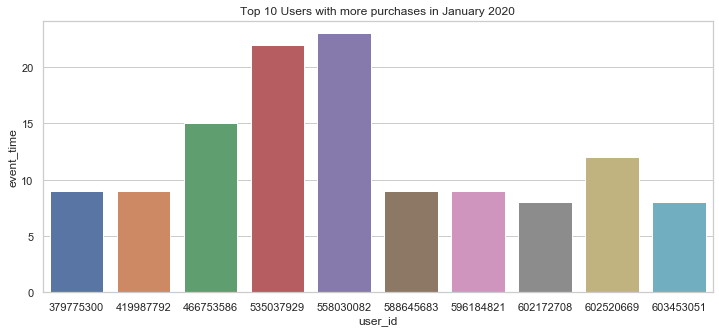

In [33]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 5))
plt.ylabel('Total of purchases')
plt.xlabel('User ID')
ax.set_title('Top 10 Users with more purchases in January 2020')
ax = sns.barplot(x=jan_purchase_frequency['user_id'], y=jan_purchase_frequency['event_time'])


We can see that the top buyer in December was the user 494776094 with 14 purchases and in January was the user 
558030082 with 23 purchases  

#### 4- Normal flow 
There are 4 types of event
* View
* Cart
* Purchase
* Remove_from_cart

A normal flow in a session should be:

#### Start >> VIEW >> CART >> REMOVE/PURCHASE


We can see the distribution of the events type in each month in a bar chart

In [187]:
events_count_dec= data_Dec_clean['event_type'].value_counts()
events_count_dec=events_count_dec.reset_index()
events_count_jan= data_Jan_clean['event_type'].value_counts()
events_count_jan=events_count_jan.reset_index()
print(events_count_dec)
print(events_count_jan)

              index  event_type
0              view       27842
1              cart        8421
2  remove_from_cart        4819
3          purchase        2111
              index  event_type
0              view       36306
1              cart       11725
2  remove_from_cart        6577
3          purchase        3160


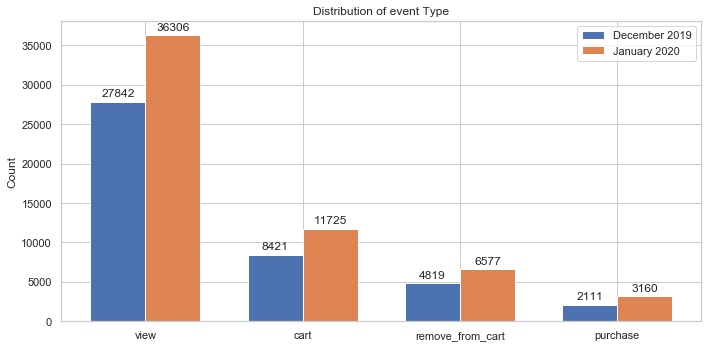

In [36]:
labels = events_count_dec['index'].values.tolist()
dec_values_type = events_count_dec['event_type'].values.tolist()
jan_values_type = events_count_jan['event_type'].values.tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, dec_values_type, width, label='December 2019')
rects2 = ax.bar(x + width/2, jan_values_type, width, label='January 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Distribution of event Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [205]:
#we transform the event_time to the event day 
data_Dec_clean_copy = data_Dec_clean.copy()
data_Dec_clean_copy['event_time'] = pd.to_datetime(data_Dec_clean_copy['event_time'],infer_datetime_format=True)
data_Dec_clean_copy['event_time_day'] = data_Dec_clean_copy['event_time'].dt.date
#---
data_Jan_clean_copy = data_Jan_clean.copy()
data_Jan_clean_copy['event_time'] = pd.to_datetime(data_Jan_clean_copy['event_time'],infer_datetime_format=True)
data_Jan_clean_copy['event_time_day'] = data_Jan_clean_copy['event_time'].dt.date
#---
x_dec = pd.to_datetime(data_Dec_clean_copy['event_time_day'], format='%Y/%m/%d')
x_jan = pd.to_datetime(data_Jan_clean_copy['event_time_day'], format='%Y/%m/%d')
print(x_dec)
print(x_jan)

33        2019-12-01
52        2019-12-01
90        2019-12-01
112       2019-12-01
138       2019-12-01
             ...    
3532871   2019-12-31
3532874   2019-12-31
3533061   2019-12-31
3533221   2019-12-31
3533226   2019-12-31
Name: event_time_day, Length: 43193, dtype: datetime64[ns]
359       2020-01-01
380       2020-01-01
487       2020-01-01
907       2020-01-01
987       2020-01-01
             ...    
4264525   2020-01-31
4264534   2020-01-31
4264594   2020-01-31
4264721   2020-01-31
4264738   2020-01-31
Name: event_time_day, Length: 57768, dtype: datetime64[ns]


In [231]:
#we group by event_time_day and event_type
events_dec = pd.DataFrame(data_Dec_clean_copy.groupby(['event_time_day','event_type']).event_time_day.agg([len]).sort_values(by='len', ascending=False))
events_dec = events_dec.reset_index()
#print(events_dec)
events_jan = pd.DataFrame(data_Jan_clean_copy.groupby(['event_time_day','event_type']).event_time_day.agg([len]).sort_values(by='len', ascending=False))
events_jan = events_jan.reset_index()
#print(events_jan)

#we concat the dataframes
events= pd.concat([events_dec, events_jan])
print(events)


    event_time_day event_type   len
0       2019-12-02       view  1219
1       2019-12-03       view  1217
2       2019-12-01       view  1199
3       2019-12-04       view  1160
4       2019-12-06       view  1158
..             ...        ...   ...
119     2020-01-11   purchase    72
120     2020-01-04   purchase    65
121     2020-01-18   purchase    60
122     2020-01-02   purchase    49
123     2020-01-01   purchase    36

[248 rows x 3 columns]


In [233]:
#we filtered for each type of event
views = events[events.event_type == 'view']
carts = events[events.event_type == 'cart']
removes = events[events.event_type == 'remove_from_cart']
purchs = events[events.event_type == 'purchase']
#print(purch_dec)

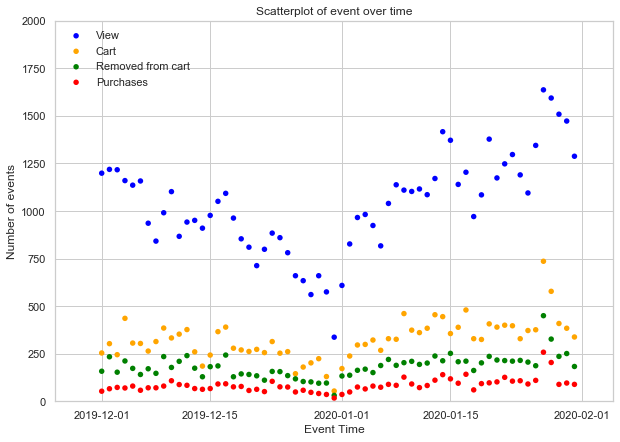

In [273]:
#we plot a scatter plot to show the number of event types over the time.
fig, ax = plt.subplots()
ax.scatter(views['event_time_day'],views['len'], edgecolors = 'none', label = 'View', s = 30, c= 'blue')
ax.scatter(carts['event_time_day'],carts['len'], edgecolors = 'none', label = 'Cart', s = 30, c='orange')
ax.scatter(removes['event_time_day'],removes['len'], edgecolors = 'none', label = 'Removed from cart', s = 30, c= 'green')
ax.scatter(purchs['event_time_day'],purchs['len'], edgecolors = 'none', label = 'Purchases', s = 30, c='red')

plt.axis(['2019-11-25','2020-02-05',0,2000])
fig.set_size_inches(10,7)
ax.grid(True)

plt.xlabel('Event Time')
plt.ylabel('Number of events')
plt.title('Scatterplot of event over time', fontsize =12)
plt.legend()
plt.show()

Using the crosstab function we can see how many events each user have

In [38]:
cross_usev_dec=pd.crosstab(data_Dec_clean['user_id'],data_Dec_clean['event_type'])
cross_usev_jan=pd.crosstab(data_Jan_clean['user_id'],data_Jan_clean['event_type'])

#we ordered by purchase event ascending, to know how user have the most purchases
cross_usev_dec.sort_values(by='purchase',ascending=False).head(10)
#print('-' * 50)
#print(cross_usev_jan.sort_values(by='purchase',ascending=False).head(10))

event_type,cart,purchase,remove_from_cart,view
user_id,,,,
494776094,31,14,0,10
591224965,7,13,0,3
587637758,31,12,14,0
582066080,10,10,0,0
487872370,9,9,0,1
416321822,23,7,6,0
586026006,9,7,0,0
582927698,8,7,0,0
565036131,33,7,12,5


We can see some extrange behaviors. For example there are users with 0 views but with items in chart or in purchase or removed.
We will be interested in the flows with the normal behavior. Let's filter our data keeping this in mind

In [39]:
#filter data with number of purchases and removed less or equal to items in cart
filter1 = (cross_usev_dec['purchase'] + cross_usev_dec['remove_from_cart']) == cross_usev_dec['cart']
filter3 = (cross_usev_jan['purchase'] + cross_usev_jan['remove_from_cart']) == cross_usev_jan['cart']

#filter data with number of items in view less or equal to number of items in cart
filter2 = cross_usev_dec['cart'] <= cross_usev_dec['view']
filter4 = cross_usev_jan['cart'] <= cross_usev_jan['view']


cross_usev_dec_filtered= cross_usev_dec[filter1 & filter2]
cross_usev_jan_filtered= cross_usev_jan[filter3 & filter4]

print(cross_usev_dec_filtered.sort_values(by='purchase',ascending=False).head(10))
print('-' * 50)
print(cross_usev_jan_filtered.sort_values(by='purchase',ascending=False).head(10))

event_type  cart  purchase  remove_from_cart  view
user_id                                           
578503834      5         5                 0    19
578762675      4         4                 0     4
583898370      4         4                 0     6
592578639      4         4                 0     5
582970394      4         4                 0     8
581360590      3         3                 0     5
588389232      2         2                 0     3
446756658      3         2                 1     6
395968291      2         2                 0    12
580674625      2         2                 0     2
--------------------------------------------------
event_type  cart  purchase  remove_from_cart  view
user_id                                           
591195223      6         6                 0     6
576965547      4         4                 0    10
464586898     11         4                 7    76
524723064      4         4                 0     7
589187852      3         3     

Let's plot the number of items purchased related to de items in cart and view

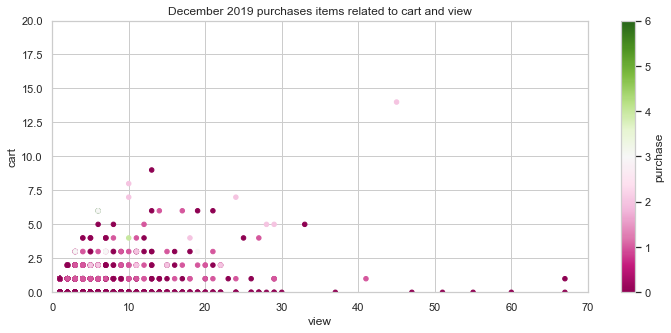

In [40]:
fig, ax = plt.subplots()
ax.set_title('December 2019 purchases items related to cart and view')
purchaser=cross_usev_dec_filtered.loc[cross_usev_dec_filtered['purchase']>0]
#print(purchaser.sort_values(by='purchase',ascending=False).head(10))
#print(purchaser.describe())
cross_usev_jan_filtered.plot(kind='scatter',x='view',y='cart',c='purchase',s=20,colormap='PiYG', figsize=(12,5), xlim=(0,70), ylim=(0,20), ax=ax)

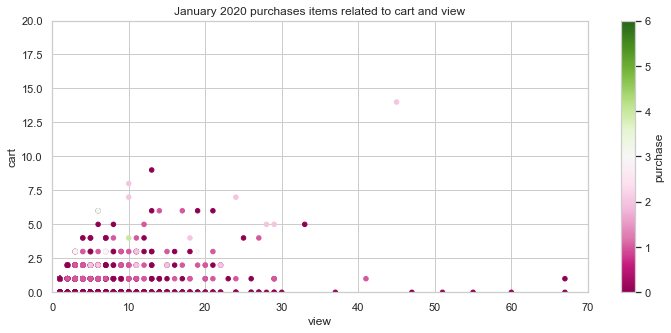

In [41]:
fig, ax = plt.subplots()
ax.set_title('January 2020 purchases items related to cart and view')
purchaser=cross_usev_jan_filtered.loc[cross_usev_jan_filtered['purchase']>0]
#print(purchaser.sort_values(by='purchase',ascending=False).head(10))
#print(purchaser.describe())
cross_usev_jan_filtered.plot(kind='scatter',x='view',y='cart',c='purchase',s=20,colormap='PiYG', figsize=(12,5), xlim=(0,70), ylim=(0,20), ax=ax)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Convert to a Classification Task</p> 

Knowing the next purchase day for a product is a good indicator for predicting sales
### Can we predicting the Next Purchase Day of a product?

Now we are going to prepare the data to applied some machine learning algorithm for classification.


In [274]:
#First we are going to join both datasets
data_concat = pd.concat([data_Dec_clean, data_Jan_clean])
print(data_Dec_clean.shape)
print(data_Jan_clean.shape)
print(data_concat.shape)

(43193, 9)
(57768, 9)
(100961, 9)


In [275]:
#change the event_time to datetime
data_concat['event_time'] = pd.to_datetime(data_concat['event_time'],infer_datetime_format=True)


First, we only take the purchases


In [276]:
#we only take the purchases
data_concat_purch = data_concat.loc[data_concat["event_type"].isin(["purchase"])]

data_concat_purch = data_concat_purch.reset_index()
data_concat_purch.head()
#print(data_concat_purch.loc[data_concat_purch.user_id == 494776094])

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2402,2019-12-01 01:18:32,purchase,5873430,2007399943458784057,apparel.glove,benovy,7.46,356011474,e38133d8-bd17-e4e1-194f-e01d325312db
1,3221,2019-12-01 02:09:57,purchase,5861766,1487580006350586771,appliances.environment.vacuum,emil,1.75,443163709,87e41332-2083-4a2e-b39c-ddfe5b7b5016
2,11617,2019-12-01 06:26:22,purchase,5889695,2007399943458784057,apparel.glove,nitrile,9.52,557560536,47f5315d-409a-4244-9fab-5e8778bdea16
3,11618,2019-12-01 06:26:22,purchase,5889696,2007399943458784057,apparel.glove,nitrile,9.52,557560536,47f5315d-409a-4244-9fab-5e8778bdea16
4,15905,2019-12-01 07:26:17,purchase,5746974,2193074740686488401,furniture.bathroom.bath,irisk,52.70,534305618,b0da4726-fce4-4e8c-a498-8cb41549463f


In [277]:
#create a dataframe with User_id, product_id and event_time Date
tx_day_order = data_concat_purch[['user_id','event_time','product_id']]
tx_day_order.head()
#print(tx_day_order.loc[tx_day_order.user_id == 494776094])

,user_id,event_time,product_id
0,356011474,2019-12-01 01:18:32,5873430
1,443163709,2019-12-01 02:09:57,5861766
2,557560536,2019-12-01 06:26:22,5889695
3,557560536,2019-12-01 06:26:22,5889696
4,534305618,2019-12-01 07:26:17,5746974


Next we need to calculate our labels (days between last purchase and first purchase after that) and the features

In [278]:
#first we created un new dataframe with the distints products id
tx_product = pd.DataFrame(data_concat_purch['product_id'].unique())
tx_product.columns = ['product_id']
#tx_product

In [279]:
# next create a dataframe with product_id and first purchase date 
tx_next_first_purchase = data_concat_purch.groupby('product_id').event_time.min().reset_index()
tx_next_first_purchase.columns = ['product_id','MinPurchaseDate']
tx_next_first_purchase.head()

,product_id,MinPurchaseDate
0,5395,2019-12-14 14:19:26
1,8372,2019-12-06 08:00:56
2,8373,2020-01-28 07:27:43
3,24330,2019-12-05 08:44:04
4,24331,2019-12-02 19:57:58


In [280]:
#next create a dataframe with customer id and last purchase date 
tx_last_purchase = data_concat_purch.groupby('product_id').event_time.max().reset_index()
tx_last_purchase.columns = ['product_id','MaxPurchaseDate']
tx_last_purchase.head()

,product_id,MaxPurchaseDate
0,5395,2020-01-28 17:56:55
1,8372,2020-01-13 08:44:00
2,8373,2020-01-28 07:27:43
3,24330,2020-01-28 16:17:51
4,24331,2020-01-29 15:39:10


In [281]:
#merge two dataframes
tx_purchase_dates = pd.merge(tx_last_purchase,tx_next_first_purchase,on='product_id',how='left')
tx_purchase_dates.head()

,product_id,MaxPurchaseDate,MinPurchaseDate
0,5395,2020-01-28 17:56:55,2019-12-14 14:19:26
1,8372,2020-01-13 08:44:00,2019-12-06 08:00:56
2,8373,2020-01-28 07:27:43,2020-01-28 07:27:43
3,24330,2020-01-28 16:17:51,2019-12-05 08:44:04
4,24331,2020-01-29 15:39:10,2019-12-02 19:57:58


In [282]:
#calculate the time difference in days:
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MaxPurchaseDate'] - tx_purchase_dates['MinPurchaseDate']).dt.days
tx_purchase_dates.head()

,product_id,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,5395,2020-01-28 17:56:55,2019-12-14 14:19:26,45
1,8372,2020-01-13 08:44:00,2019-12-06 08:00:56,38
2,8373,2020-01-28 07:27:43,2020-01-28 07:27:43,0
3,24330,2020-01-28 16:17:51,2019-12-05 08:44:04,54
4,24331,2020-01-29 15:39:10,2019-12-02 19:57:58,57


In [283]:
#merge with tx_product 
tx_product = pd.merge(tx_product, tx_purchase_dates[['product_id','NextPurchaseDay']],on='product_id',how='left')
#fill NA values with 999
tx_product = tx_product.fillna(999)
tx_product.head()

,product_id,NextPurchaseDay
0,5873430,58
1,5861766,54
2,5889695,61
3,5889696,60
4,5746974,61


Back to the tx_day_order dataframe:

In [284]:
#convert event time to day
tx_day_order['PurchaseDay'] = data_concat_purch['event_time'].dt.date
tx_day_order = tx_day_order.sort_values(['product_id','event_time'])
#print(tx_day_order.loc[tx_day_order.product_id == 5766980 ].head())

#drop duplicates
#Then we will remove the duplicates since customers can do multiple purchases of the same product in a day 
tx_day_order = tx_day_order.drop_duplicates(subset=['PurchaseDay','product_id'],keep='first')
#print(tx_day_order.loc[tx_day_order.product_id == 5766980 ].head())
tx_day_order.head()

C:\Users\clara.o.villalba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,event_time,product_id,PurchaseDay
997,568407203,2019-12-14 14:19:26,5395,2019-12-14
1609,450923816,2019-12-23 04:03:22,5395,2019-12-23
1732,585040980,2019-12-24 09:23:23,5395,2019-12-24
2038,562973122,2019-12-29 14:01:58,5395,2019-12-29
2067,586595889,2019-12-30 06:37:42,5395,2019-12-30


Now we need to get the last 3 dates the product was purchased, to do that we use the shift() function

In [285]:
#shifting last 3 purchase dates of each product
tx_day_order['PrevPurchaseDate'] = tx_day_order.groupby(['product_id'])['PurchaseDay'].shift(1)
tx_day_order['T2PurchaseDate'] = tx_day_order.groupby(['product_id'])['PurchaseDay'].shift(2)
tx_day_order['T3PurchaseDate'] = tx_day_order.groupby(['product_id'])['PurchaseDay'].shift(3)
tx_day_order.head()
#tx_day_order.loc[tx_day_order.product_id == 5766980]

,user_id,event_time,product_id,PurchaseDay,PrevPurchaseDate,T2PurchaseDate,T3PurchaseDate
997,568407203,2019-12-14 14:19:26,5395,2019-12-14,NaN,NaN,NaN
1609,450923816,2019-12-23 04:03:22,5395,2019-12-23,2019-12-14,NaN,NaN
1732,585040980,2019-12-24 09:23:23,5395,2019-12-24,2019-12-23,2019-12-14,NaN
2038,562973122,2019-12-29 14:01:58,5395,2019-12-29,2019-12-24,2019-12-23,2019-12-14
2067,586595889,2019-12-30 06:37:42,5395,2019-12-30,2019-12-29,2019-12-24,2019-12-23


Now we are going to caculate the difference in days for each product purchase date

In [286]:
tx_day_order['DayDiff'] = (tx_day_order['PurchaseDay'] - tx_day_order['PrevPurchaseDate']).dt.days
tx_day_order['DayDiff2'] = (tx_day_order['PurchaseDay'] - tx_day_order['T2PurchaseDate']).dt.days
tx_day_order['DayDiff3'] = (tx_day_order['PurchaseDay'] - tx_day_order['T3PurchaseDate']).dt.days
tx_day_order
#tx_day_order.loc[tx_day_order.product_id == 5766980].head(20)

,user_id,event_time,product_id,PurchaseDay,PrevPurchaseDate,T2PurchaseDate,T3PurchaseDate,DayDiff,DayDiff2,DayDiff3
997,568407203,2019-12-14 14:19:26,5395,2019-12-14,NaN,NaN,NaN,NaN,NaN,NaN
1609,450923816,2019-12-23 04:03:22,5395,2019-12-23,2019-12-14,NaN,NaN,9.0,NaN,NaN
1732,585040980,2019-12-24 09:23:23,5395,2019-12-24,2019-12-23,2019-12-14,NaN,1.0,10.0,NaN
2038,562973122,2019-12-29 14:01:58,5395,2019-12-29,2019-12-24,2019-12-23,2019-12-14,5.0,6.0,15.0
2067,586595889,2019-12-30 06:37:42,5395,2019-12-30,2019-12-29,2019-12-24,2019-12-23,1.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...
4887,606788454,2020-01-28 12:10:47,5921389,2020-01-28,2020-01-22,NaN,NaN,6.0,NaN,NaN
5059,607825178,2020-01-29 18:04:51,5921389,2020-01-29,2020-01-28,2020-01-22,NaN,1.0,7.0,NaN
5195,534057467,2020-01-31 04:09:53,5921389,2020-01-31,2020-01-29,2020-01-28,2020-01-22,2.0,3.0,9.0
4895,487251557,2020-01-28 13:00:30,5921391,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN


For each product ID, we utilize .agg() method to find out the mean and standard deviation
of the difference between purchases in days

In [91]:
tx_day_diff = tx_day_order.groupby('product_id').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['product_id', 'DayDiffMean','DayDiffStd']
tx_day_diff.head()
tx_day_diff.shape
#tx_day_diff.loc[tx_day_diff.product_id == 5766980]

(245, 3)

In [92]:
#drop duplicated and keep the last
tx_day_order_last = tx_day_order.drop_duplicates(subset=['product_id'],keep='last')
tx_day_order_last.loc[tx_day_order.product_id == 24331]
tx_day_order_last.shape

(245, 10)

In [93]:
#Drop NAN values
tx_day_order_last = tx_day_order_last.dropna()
tx_day_order_last.head()

,user_id,event_time,product_id,PurchaseDay,PrevPurchaseDate,T2PurchaseDate,T3PurchaseDate,DayDiff,DayDiff2,DayDiff3
4844,607103363,2020-01-28 08:56:21,5395,2020-01-28,2020-01-27,2020-01-26,2020-01-23,1.0,2.0,5.0
3064,530311269,2020-01-13 08:44:00,8372,2020-01-13,2020-01-05,2019-12-28,2019-12-24,8.0,16.0,20.0
4934,600569855,2020-01-28 16:17:51,24330,2020-01-28,2020-01-25,2020-01-22,2020-01-21,3.0,6.0,7.0
5044,577514838,2020-01-29 15:39:10,24331,2020-01-29,2020-01-26,2020-01-23,2020-01-22,3.0,6.0,7.0
4189,605133120,2020-01-23 16:43:41,24332,2020-01-23,2020-01-13,2020-01-07,2019-12-25,10.0,16.0,29.0


In [94]:
#Merge dataframes
tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='product_id')
tx_day_order_last.head()

,user_id,event_time,product_id,PurchaseDay,PrevPurchaseDate,T2PurchaseDate,T3PurchaseDate,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,607103363,2020-01-28 08:56:21,5395,2020-01-28,2020-01-27,2020-01-26,2020-01-23,1.0,2.0,5.0,3.000000,2.449490
1,530311269,2020-01-13 08:44:00,8372,2020-01-13,2020-01-05,2019-12-28,2019-12-24,8.0,16.0,20.0,7.600000,3.507136
2,600569855,2020-01-28 16:17:51,24330,2020-01-28,2020-01-25,2020-01-22,2020-01-21,3.0,6.0,7.0,2.076923,1.293772
3,577514838,2020-01-29 15:39:10,24331,2020-01-29,2020-01-26,2020-01-23,2020-01-22,3.0,6.0,7.0,2.320000,1.908752
4,605133120,2020-01-23 16:43:41,24332,2020-01-23,2020-01-13,2020-01-07,2019-12-25,10.0,16.0,29.0,7.285714,4.309458


Merge tx_day_order_last dataframes with tx_product and apply .get_dummies() for converting categorical values:

In [95]:
tx_product = pd.merge(tx_product, tx_day_order_last[['product_id','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='product_id')
#create tx_class as a copy of tx_user before applying get_dummies
tx_class = tx_product.copy()
tx_class = pd.get_dummies(tx_class)
tx_class.head()

,product_id,NextPurchaseDay,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,5873430,58,1.0,2.0,4.0,1.870968,1.765256
1,5861766,54,7.0,8.0,13.0,6.750000,7.146428
2,5889695,61,3.0,6.0,7.0,2.033333,1.496740
3,5889696,60,1.0,2.0,3.0,2.857143,2.988072
4,5746974,61,2.0,3.0,4.0,3.388889,2.872566


Our feature set is ready for building a classification model.
Now we need to define our labels. To do that fisrt:

In [96]:
tx_product.NextPurchaseDay.describe()

count    180.000000
mean      48.461111
std       13.008963
min        7.000000
25%       43.000000
50%       54.000000
75%       58.000000
max       61.000000
Name: NextPurchaseDay, dtype: float64

Considering the information adove we decide this boundaries:

* 0-40: class_name = 2
* 41-55: class_name = 1
* />55: class_name = 0
So our labels will be 0, 1 and 2

In [97]:
tx_class['NextPurchaseDayRange'] = 2
tx_class.loc[tx_class.NextPurchaseDay>40,'NextPurchaseDayRange'] = 1
tx_class.loc[tx_class.NextPurchaseDay>55,'NextPurchaseDayRange'] = 0
tx_class

,product_id,NextPurchaseDay,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd,NextPurchaseDayRange
0,5873430,58,1.0,2.0,4.0,1.870968,1.765256,0
1,5861766,54,7.0,8.0,13.0,6.750000,7.146428,1
2,5889695,61,3.0,6.0,7.0,2.033333,1.496740,0
3,5889696,60,1.0,2.0,3.0,2.857143,2.988072,0
4,5746974,61,2.0,3.0,4.0,3.388889,2.872566,0
...,...,...,...,...,...,...,...,...
175,5892335,8,4.0,5.0,9.0,3.000000,1.732051,2
176,5710610,9,1.0,4.0,10.0,3.333333,2.516611,2
177,5889693,13,2.0,3.0,12.0,3.250000,3.862210,2
178,5885589,7,3.0,7.0,8.0,2.666667,1.527525,2


We can see the porcentage of each we have in our dataset

In [99]:
tx_class.NextPurchaseDayRange.value_counts()/len(tx_product)

0    0.394444
1    0.383333
2    0.222222
Name: NextPurchaseDayRange, dtype: float64

The last step is to see the correlation between our features and label. 
The correlation matrix is one of the cleanest ways to show this:

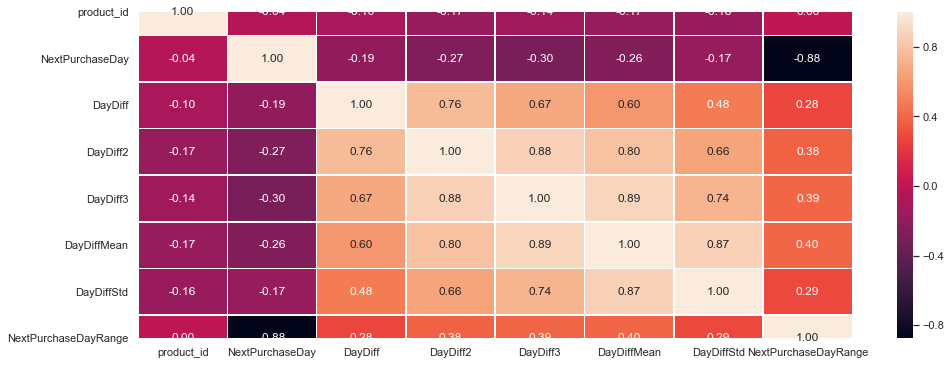

In [100]:
corr = tx_class[tx_class.columns].corr()
plt.figure(figsize = (16,6))
sns.heatmap(corr, annot = True, linewidths=0.5, fmt=".2f")

Now we need to separate Target and features:

In [101]:
features= ['product_id','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']
y= tx_class[['NextPurchaseDayRange']].copy()
X =tx_class[features].copy()
y.columns

Index(['NextPurchaseDayRange'], dtype='object')

In [102]:
#train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
y_train.head()

,NextPurchaseDayRange
151,2
134,2
41,0
162,2
175,2


In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test['NextPurchaseDayRange'].values.tolist() != y_pred).sum()))
#print(classification_report(y_test, y_pred))

0.35
Number of mislabeled points out of a total 60 points : 39


C:\Users\clara.o.villalba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
print(y_test.NextPurchaseDayRange.value_counts()/len(tx_product))
test_values_NB = (y_test.NextPurchaseDayRange.value_counts()/len(tx_product)).tolist()
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['NextPurchaseDayRange']
print(y_pred_df.NextPurchaseDayRange.value_counts()/len(tx_product))
pred_values_NB = (y_pred_df.NextPurchaseDayRange.value_counts()/len(tx_product)).tolist()

0    0.161111
1    0.116667
2    0.055556
Name: NextPurchaseDayRange, dtype: float64
1    0.333333
Name: NextPurchaseDayRange, dtype: float64


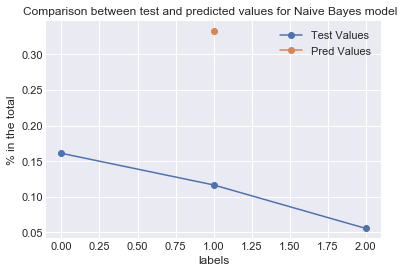

In [149]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# line 1 points
x1 = [0,1,2]
y1 = test_values_NB
# plotting the line 1 points 
plt.plot(x1, y1, label = "Test Values",marker='o')
# line 2 points
x2 = [1]
y2 = pred_values_NB
# plotting the line 2 points 
plt.plot(x2, y2, label = "Pred Values",marker='o')
plt.xlabel('labels')
# Set the y axis label of the current axis.
plt.ylabel('% in the total')
# Set a title of the current axes.
plt.title('Comparison between test and predicted values for Naive Bayes model  ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [104]:
from sklearn.tree import DecisionTreeClassifier
train_classifier = DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)
v = train_classifier.fit(X_train, y_train)
y_pred2 = v.predict(X_test)
print(accuracy_score(y_test, y_pred2))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test['NextPurchaseDayRange'].values.tolist() != y_pred2).sum()))
#print(classification_report(y_test, y_pred))

0.5666666666666667
Number of mislabeled points out of a total 60 points : 26


In [140]:
print(y_pred2)
print((y_test.NextPurchaseDayRange.value_counts()/len(tx_product)))
test_values_DT = (y_test.NextPurchaseDayRange.value_counts()/len(tx_product)).tolist()
y_pred_df = pd.DataFrame(y_pred2)
y_pred_df.columns = ['NextPurchaseDayRange']
print((y_pred_df.NextPurchaseDayRange.value_counts()/len(tx_product)))
pred_values_DT =(y_pred_df.NextPurchaseDayRange.value_counts()/len(tx_product)).tolist()
print(test_values_DT)
print(pred_values_DT)

[1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1]
0    0.161111
1    0.116667
2    0.055556
Name: NextPurchaseDayRange, dtype: float64
1    0.222222
0    0.111111
Name: NextPurchaseDayRange, dtype: float64
[0.16111111111111112, 0.11666666666666667, 0.05555555555555555]
[0.2222222222222222, 0.1111111111111111]


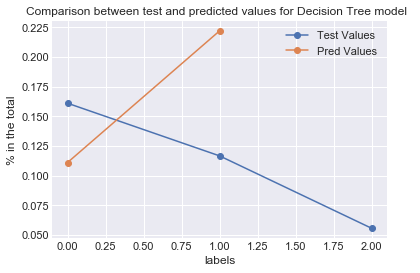

In [142]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# line 1 points
x1 = [0,1,2]
y1 = test_values_DT
# plotting the line 1 points 
plt.plot(x1, y1, label = "Test Values",marker='o')
# line 2 points
x2 = [1,0]
y2 = pred_values_DT
# plotting the line 2 points 
plt.plot(x2, y2, label = "Pred Values",marker='o')
plt.xlabel('labels')
# Set the y axis label of the current axis.
plt.ylabel('% in the total')
# Set a title of the current axes.
plt.title('Comparison between test and predicted values for Decision Tree model  ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
y_pred = knn.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test['NextPurchaseDayRange'].values.tolist() != y_pred).sum()))
#print(classification_report(y_test, y_pred))

0.65
Number of mislabeled points out of a total 60 points : 21


C:\Users\clara.o.villalba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


From this result, we see that KNeighborsClassifier is the best performing one (~65% accuracy).

In [126]:
test_values = (y_test.NextPurchaseDayRange.value_counts()/len(tx_product)).tolist()
#y_test 
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['NextPurchaseDayRange']
#y_pred_df
pred_values = (y_pred_df.NextPurchaseDayRange.value_counts()/len(tx_product)).tolist()
print(test_values)
print(pred_values)

[0.16111111111111112, 0.11666666666666667, 0.05555555555555555]
[0.18888888888888888, 0.10555555555555556, 0.03888888888888889]


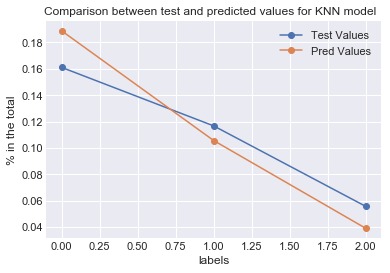

In [153]:
import matplotlib.pyplot as plt
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# line 1 points
x1 = [0,1,2]
y1 = test_values
# plotting the line 1 points 
plt.plot(x1, y1, label = "Test Values",marker='o')
# line 2 points
x2 = [0,1,2]
y2 = pred_values
# plotting the line 2 points 
plt.plot(x2, y2, label = "Pred Values",marker='o')
plt.xlabel('labels')
# Set the y axis label of the current axis.
plt.ylabel('% in the total')
# Set a title of the current axes.
plt.title('Comparison between test and predicted values for KNN model  ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Conclusions

 In this study of the dataset of eCommerce Events History in Cosmetics Shop we got some metrics that could be useful to have knowledge about the events in December 2019 compared to the events in January 2020
 
 On the other hand, we trained a model to predict  the Next Purchase Day of a product  we an accuracy of 0.65, which is a very good score.
